In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/albanda/ce888/master/lab3/bank-additional-full.csv", delimiter=";")
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Non of the columns have missing values

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
categoric_features=[]
numeric_features=[]
for columns in df.columns:
    if df[columns].dtype=="object":
        categoric_features.append(columns)
    else:
        numeric_features.append(columns)
print("categoric_features are",categoric_features)
print("numeric features are",numeric_features)

categoric_features are ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y']
numeric features are ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


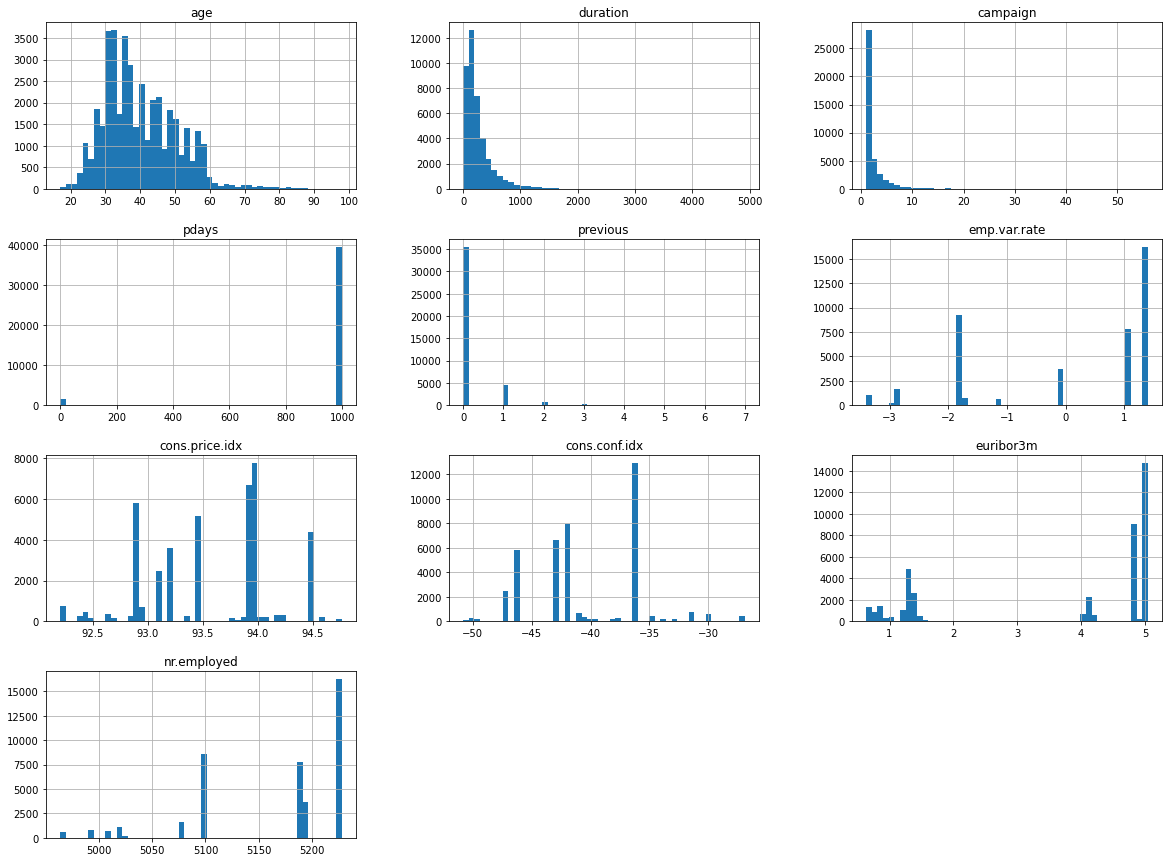

In [6]:
_ = df.hist(bins=50, figsize=(20,15))

In [7]:
for feature in numeric_features:
    print("Unique values in feature",feature,"=",len(df[feature].unique()))

Unique values in feature age = 78
Unique values in feature duration = 1544
Unique values in feature campaign = 42
Unique values in feature pdays = 27
Unique values in feature previous = 8
Unique values in feature emp.var.rate = 10
Unique values in feature cons.price.idx = 26
Unique values in feature cons.conf.idx = 26
Unique values in feature euribor3m = 316
Unique values in feature nr.employed = 11


In [8]:
to_remove=[]
for feature in numeric_features:
    
    if (len(df[feature].unique())<30):
        to_remove.append(feature)
        categoric_features.append(feature)

for i in to_remove:
    numeric_features.remove(i)
print("categoric_features are",categoric_features)
print("numeric features are",numeric_features)

categoric_features are ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome', 'y', 'pdays', 'previous', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'nr.employed']
numeric features are ['age', 'duration', 'campaign', 'euribor3m']


In [9]:
df.drop(["duration"],axis=1,inplace=True)
numeric_features.remove("duration")

In [10]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


# Converting Categoric features

In [11]:
df= pd.get_dummies(df, columns=['y'],drop_first=True)

In [12]:
df

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y_yes
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,0
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,1


In [13]:
df= pd.get_dummies(df, columns=['job','marital','housing','loan','contact','month','day_of_week'],drop_first=True)

In [14]:
df

,age,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,basic.4y,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
1,57,high.school,unknown,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
2,37,high.school,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
3,40,basic.6y,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
4,56,high.school,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,professional.course,no,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41184,46,professional.course,no,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41185,56,university.degree,no,2,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41186,44,professional.course,no,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0


In [15]:
df.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [16]:
education = {'illiterate':0,'unknown':1,'basic.4y':2,'basic.6y':3,'basic.9y':4,'high.school':5,'professional.course':6,'university.degree':7}

In [17]:
df["education"] = df["education"].replace(education)

In [18]:
df

,age,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,2,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
1,57,5,unknown,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
2,37,5,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
3,40,3,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
4,56,5,no,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,no,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41184,46,6,no,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41185,56,7,no,2,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41186,44,6,no,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0


In [19]:
df.default.unique()

array(['no', 'unknown', 'yes'], dtype=object)

In [20]:
default = {'unknown':0,'no':1,'yes':2}

In [21]:
df['default'] = df['default'].replace(default)

In [22]:
df

,age,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,2,1,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
1,57,5,0,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
2,37,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
3,40,3,1,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
4,56,5,1,1,999,0,nonexistent,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41184,46,6,1,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41185,56,7,1,2,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41186,44,6,1,1,999,0,nonexistent,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0


In [23]:
df.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [24]:
poutcome = {'nonexistent':0,'failure':1,'success':2}

In [25]:
df['poutcome'] = df['poutcome'].replace(poutcome)
df

,age,education,default,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,56,2,1,1,999,0,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
1,57,5,0,1,999,0,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
2,37,5,1,1,999,0,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
3,40,3,1,1,999,0,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
4,56,5,1,1,999,0,0,1.1,93.994,-36.4,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,6,1,1,999,0,0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41184,46,6,1,1,999,0,0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41185,56,7,1,2,999,0,0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0
41186,44,6,1,1,999,0,0,-1.1,94.767,-50.8,...,0,0,0,1,0,0,0,0,0,0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                41188 non-null  int64  
 1   education          41188 non-null  int64  
 2   default            41188 non-null  int64  
 3   campaign           41188 non-null  int64  
 4   pdays              41188 non-null  int64  
 5   previous           41188 non-null  int64  
 6   poutcome           41188 non-null  int64  
 7   emp.var.rate       41188 non-null  float64
 8   cons.price.idx     41188 non-null  float64
 9   cons.conf.idx      41188 non-null  float64
 10  euribor3m          41188 non-null  float64
 11  nr.employed        41188 non-null  float64
 12  y_yes              41188 non-null  uint8  
 13  job_blue-collar    41188 non-null  uint8  
 14  job_entrepreneur   41188 non-null  uint8  
 15  job_housemaid      41188 non-null  uint8  
 16  job_management     411

In [29]:
target = df["y_yes"]
X_df = df.drop(["y_yes"],axis=1)

In [30]:
scaler =StandardScaler()

In [32]:
x_scaled = scaler.fit_transform(X_df)

In [33]:
x_scaled

array([[ 1.53303429, -1.65004667,  0.51325992, ..., -0.51458089,
        -0.49439422, -0.4960667 ],
       [ 1.62899323,  0.0079435 , -1.9466132 , ..., -0.51458089,
        -0.49439422, -0.4960667 ],
       [-0.29018564,  0.0079435 ,  0.51325992, ..., -0.51458089,
        -0.49439422, -0.4960667 ],
       ...,
       [ 1.53303429,  1.11327027,  0.51325992, ..., -0.51458089,
        -0.49439422, -0.4960667 ],
       [ 0.38152696,  0.56060689,  0.51325992, ..., -0.51458089,
        -0.49439422, -0.4960667 ],
       [ 3.26029527,  0.56060689,  0.51325992, ..., -0.51458089,
        -0.49439422, -0.4960667 ]])

In [35]:
from sklearn.metrics import SCORERS
print(sorted(SCORERS.keys()))


['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_root_mean_squared_error', 'normalized_mutual_info_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc', 'roc_auc_ovo', 'roc_auc_ovo_weighted', 'roc_auc_ovr', 'roc_auc_ovr_weighted', 'top_k_accuracy', 'v_measure_score']


In [37]:
X_train,X_test,y_train,y_test=train_test_split(x_scaled,target,train_size=0.8,random_state=50,stratify=target) 

In [39]:
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.metrics import SCORERS
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.dummy import DummyRegressor, DummyClassifier

In [42]:
dummy_clf = DummyClassifier(strategy='stratified')
dummy_clf.fit(X_train, y_train)
print("Dummy ACC: %.2f" % f1_score(target, dummy_clf.predict(x_scaled)))

Dummy ACC: 0.11


In [43]:

scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))
print(scores)

ACC: 0.11 +/- 0.02
[0.12057667 0.12600536 0.13096862 0.08567604 0.08481532 0.09873061
 0.1012987  0.11186903 0.11904762 0.10889774]


In [44]:
clf = RandomForestClassifier(n_estimators=100, max_depth=3)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.26 +/- 0.04


In [45]:
clf = RandomForestClassifier(n_estimators=100, max_depth=8)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.31 +/- 0.04


In [47]:
clf = RandomForestClassifier(n_estimators=100, max_depth=12,random_state=60)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.35 +/- 0.04


# Feature importance 

In [52]:
clf = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=60)
scores = cross_val_score(clf, X_train, y_train, cv=10, scoring=make_scorer(f1_score))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))

ACC: 0.33 +/- 0.04


In [53]:
clf.fit(X_train, y_train)

importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print(indices)




[10 11  4  6  7  9  8  0  5  3  1 30 38 35 36 40 27 41 23  2 42 24 43 12
 29 16 20 34 19 39 15 18 17 21 33 37 31 26 28 14 22 13 32 25]
